In [7]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet18BinaryClassifier, Resnet50BinaryClassifier
from train import train_classifier
from utils import plot_model_metrics
from utils import reduce_dataset, split_dataset, undersample_dataset

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 256
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
# train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet50BinaryClassifier( hidden_layers=1, units_per_layer=2048,
                      dropout=0.3, focal_alpha=0.9, focal_gamma=2.0)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 14,277 training, 6,120 testing


In [8]:
print(model)

Resnet50BinaryClassifier(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsampl

In [9]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2025-02-05T19:47:01.525713


In [10]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        start_learning_rate=0.000075,
                                        max_epochs=5,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 56/56 [00:44<00:00,  1.26it/s]


Train: 1/5: lr: 0.000075000000 loss:0.016541027098095844


Epoch 1 testing: 100%|██████████| 24/24 [00:18<00:00,  1.28it/s]


Test: 1/5: loss:0.014586529927328229, accuracy:0.8014884159482758, precision:0.2326667811259168, recall:0.8950049981551529, f1:0.3656397796333238, mcc:0.3902252234989276, ece:0.19851158497234186, epoch:1


Epoch 2 training: 100%|██████████| 56/56 [00:42<00:00,  1.30it/s]


Train: 2/5: lr: 0.000075000000 loss:0.012201655572945518


Epoch 2 testing: 100%|██████████| 24/24 [00:21<00:00,  1.09it/s]


Test: 2/5: loss:0.01294365203163276, accuracy:0.8428351742097702, precision:0.27814524265452567, recall:0.8865313886089732, f1:0.4201027099256954, mcc:0.43959933270729534, ece:0.15716482574741045, epoch:2


Epoch 3 training: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]


Train: 3/5: lr: 0.000075000000 loss:0.010428072751632758


Epoch 3 testing: 100%|██████████| 24/24 [00:18<00:00,  1.32it/s]


Test: 3/5: loss:0.012900262780021876, accuracy:0.8942225664511495, precision:0.3601841461710082, recall:0.8010694257293313, f1:0.4921919652215978, mcc:0.48950805304519424, ece:0.10577743252118428, epoch:3


Epoch 4 training: 100%|██████████| 56/56 [00:45<00:00,  1.24it/s]


Train: 4/5: lr: 0.000075000000 loss:0.009231131191232375


Epoch 4 testing: 100%|██████████| 24/24 [00:19<00:00,  1.23it/s]


Test: 4/5: loss:0.013674514212956032, accuracy:0.9214428430316092, precision:0.4525214210326096, recall:0.7693801543976955, f1:0.5626046821909495, mcc:0.5497163824254613, ece:0.07855715633680423, epoch:4


Epoch 5 training: 100%|██████████| 56/56 [00:49<00:00,  1.14it/s]


Train: 5/5: lr: 0.000075000000 loss:0.008076189692863929


Epoch 5 testing: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]


Test: 5/5: loss:0.012878543542077145, accuracy:0.9044596354166666, precision:0.3833808300285988, recall:0.791325378733467, f1:0.5116261744373328, mcc:0.5061893734656375, ece:0.09554036241024733, epoch:5


Training ends 2025-02-05T19:52:31.474271
Test accuracy: 0.9044596354166666
Test precision: 0.3833808300285988
Test recall: 0.791325378733467
Test f1: 0.5116261744373328
Test mcc: 0.5061893734656375


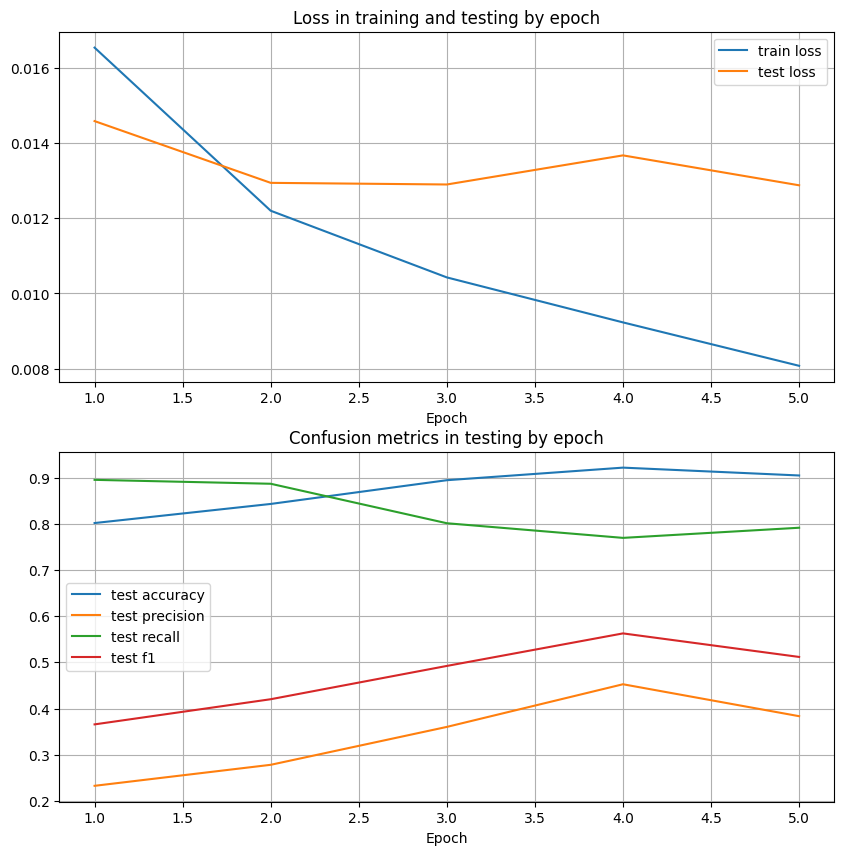

In [11]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [12]:
torch.save(model, "model.pickle")